# House Price Prediction

The solution is divided into the following sections:
1. Data Loading & Understanding
2. Data cleaning
3. Data preparation
4. Model building and Evaluation
5. Observation and Inference

In [1]:
# importing all the important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df = pd.read_csv("train.csv", encoding = 'utf-8')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
# Check the dimensions
df.shape


(1168, 81)

In [4]:
# Check for column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
# To get the description of the dataset
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
#checking duplicates
sum(df.duplicated(subset = 'Id')) == 0

True

In [7]:
# Finding the Null Values in each columns
print('Percentage of Missing Values in each column is as follows:')
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

Percentage of Missing Values in each column is as follows:
PoolQC          99.40
MiscFeature     96.23
Alley           93.41
Fence           79.71
FireplaceQu     47.17
LotFrontage     18.32
GarageYrBlt      5.48
GarageFinish     5.48
GarageType       5.48
GarageQual       5.48
GarageCond       5.48
BsmtExposure     2.65
BsmtFinType2     2.65
BsmtQual         2.57
BsmtCond         2.57
BsmtFinType1     2.57
MasVnrType       0.60
MasVnrArea       0.60
dtype: float64


In [8]:
# Checking for percentage nulls
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      18.32
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [9]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
90%    1307.300000   120.000000     96.00000   14311.400000     8.000000   
95%    1381.650000   160.000000    108.00000   17473.050000     8.000000   
99%    1443.330000   190.000000    146.35000   36863.520000    10.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
90%       7.000000  2006.000000   2007.000000   320.000000  1070.300000  ...   
95%       8.000000  2007.000000   2007.000000   451.000000  1281.300000  ...   
99%       9.000000  2009.000000   2009.000000   804.000000  1583.890000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
90%     261.300000   132.000000     112.000000     0.000000     0.000000   
95%     341.300000   170.000000     187.600000     0.000000   160.000000   
99%     502.970000   283.980000     265.320000   168.000000   265.330000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
90%       0.000000      0.000000    10.000000  2010.000000  277650.000000  
95%       0.000000      0.000000    11.000000  2010.000000  325000.000000  
99%       0.000000    915.500000    12.000000  2010.000000  443943.500000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[11 rows x 38 columns]

In [10]:
# check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1091
MasVnrType         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

# Data cleaning

In [11]:
# Checking "NaN" Values have any impact on the Sale Price or not
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
     df[col]=df[col].fillna('None')

In [12]:
 #Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

In [13]:
columnsToBeRemoved = getHighCategoricalValueCounts()

In [14]:
# Remove the columns with skewed data

df.drop(columnsToBeRemoved, axis = 1, inplace = True)

In [15]:

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave  None      IR1   
1  889          20       RL         95.0    15865   Pave  None      IR1   
2  793          60       RL         92.0     9920   Pave  None      IR1   
3  110          20       RL        105.0    11751   Pave  None      IR1   
4  422          20       RL          NaN    16635   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0   None   None        None       0   
1         Lvl    AllPub  ...        0   None   None        None       0   
2         Lvl    AllPub  ...        0   None   None        None       0   
3         Lvl    AllPub  ...        0   None  MnPrv        None       0   
4         Lvl    AllPub  ...        0   None   None        None       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [16]:
# once again check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [17]:
# check the null values in the numerical data
df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    214
MasVnrArea       7
GarageYrBlt     64
dtype: int64

In [18]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [19]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] =df['GarageYrBlt'].astype(int)

In [20]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [21]:
df.shape

(1168, 81)

In [22]:
# since, it is clear that there are multiple columns with high nulls, lets group them together
df.columns[df.isnull().any()] 

null = df.isnull().sum()/len(df)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

Series([], dtype: float64)

In [23]:
# Check nulls once again

df.columns[df.isnull().any()] 

null_2 = df.isnull().sum()/len(df)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

Series([], dtype: float64)

In [24]:
# Will check these columns one by one
df['LotFrontage'].describe()

count    1168.000000
mean       70.807363
std        22.440317
min        21.000000
25%        60.000000
50%        70.000000
75%        79.250000
max       313.000000
Name: LotFrontage, dtype: float64

In [25]:
df['GarageYrBlt'].describe()

count    1168.000000
mean     1869.799658
std       451.037303
min         0.000000
25%      1957.750000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [26]:
df['MasVnrArea'].describe()

count    1168.000000
mean      101.696918
std       182.218483
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [27]:
df['Electrical'].describe()

count      1168
unique        5
top       SBrkr
freq       1070
Name: Electrical, dtype: object

In [28]:
# As per the df dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["Electrical"].dropna(inplace=True)

In [29]:
# Crosscheck the updated 'LotFrontage' column
df['LotFrontage'].describe()

count    1168.000000
mean       70.807363
std        22.440317
min        21.000000
25%        60.000000
50%        70.000000
75%        79.250000
max       313.000000
Name: LotFrontage, dtype: float64

In [30]:
df['GarageYrBlt'].describe()

count    1168.000000
mean     1869.799658
std       451.037303
min         0.000000
25%      1957.750000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [31]:
df['MasVnrArea'].describe()

count    1168.000000
mean      101.696918
std       182.218483
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [32]:
df['Electrical'].describe()

count      1168
unique        5
top       SBrkr
freq       1070
Name: Electrical, dtype: object

In [33]:
# Check the no. of rows retained
len(df.index)
len(df.index)/1168

1.0

In [34]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120         70.0     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20         70.0    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          1976         0.0         120  ...           0          205   
1          1970         0.0         351  ...          81          207   
2          1997         0.0         862  ...         180          130   
3          1977       480.0         705  ...           0          122   
4          2000       126.0        1246  ...         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000  

[5 rows x 38 columns]

In [35]:
# Dropping ID Column
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120         70.0     4928            6            5       1976   
1          20         95.0    15865            8            6       1970   
2          60         92.0     9920            7            5       1996   
3          20        105.0    11751            6            6       1977   
4          20         70.0    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          1976         0.0         120           0  ...           0   
1          1970         0.0         351         823  ...          81   
2          1997         0.0         862           0  ...         180   
3          1977       480.0         705           0  ...           0   
4          2000       126.0        1246           0  ...         240   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0          205              0          0            0         0        0   
1          207              0          0          224         0        0   
2          130              0          0            0         0        0   
3          122              0          0            0         0        0   
4            0              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2007     128000  
1      10    2007     268000  
2       6    2007     269790  
3       1    2010     190000  
4       6    2009     215000  

[5 rows x 37 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'NPkVill'),
  Text(1, 0, 'NAmes'),
  Text(2, 0, 'NoRidge'),
  Text(3, 0, 'NWAmes'),
  Text(4, 0, 'Gilbert'),
  Text(5, 0, 'Sawyer'),
  Text(6, 0, 'Edwards'),
  Text(7, 0, 'IDOTRR'),
  Text(8, 0, 'CollgCr'),
  Text(9, 0, 'Mitchel'),
  Text(10, 0, 'Crawfor'),
  Text(11, 0, 'BrDale'),
  Text(12, 0, 'StoneBr'),
  Text(13, 0, 'BrkSide'),
  Text(14, 0, 'NridgHt'),
  Text(15, 0, 'OldTown'),
  Text(16, 0, 'Somerst'),
  Text(17, 0, 'Timber'),
  Text(18, 0, 'SWISU'),
  Text(19, 0, 'SawyerW'),
  Text(20, 0, 'ClearCr'),
  Text(21, 0, 'Veenker'),
  Text(22, 0, 'Blmngtn'),
  Text(23, 0, 'MeadowV'),
  Text(24, 0, 'Blueste')])

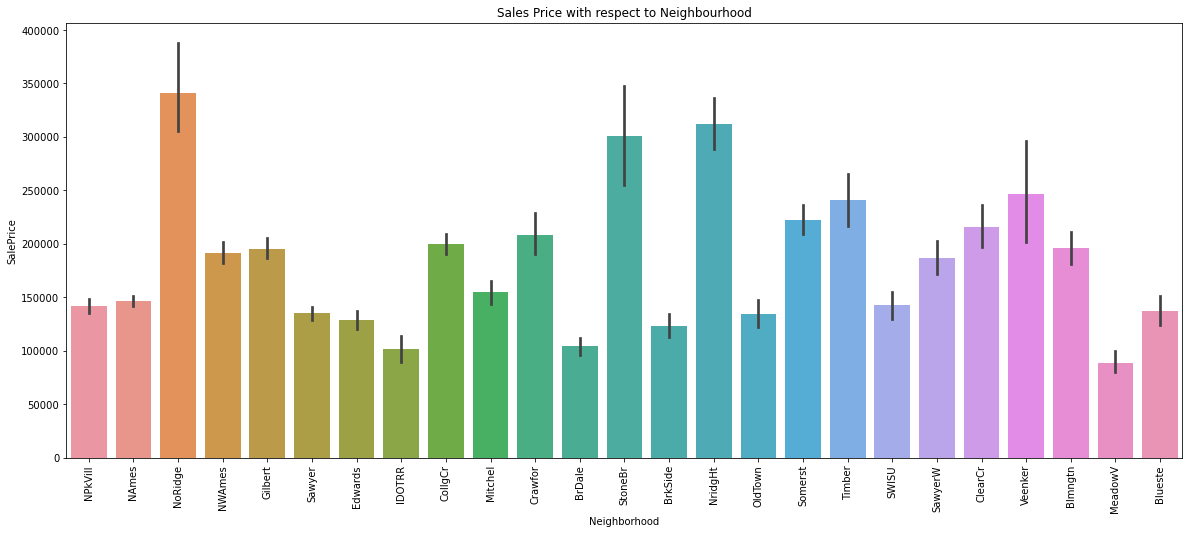

In [36]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

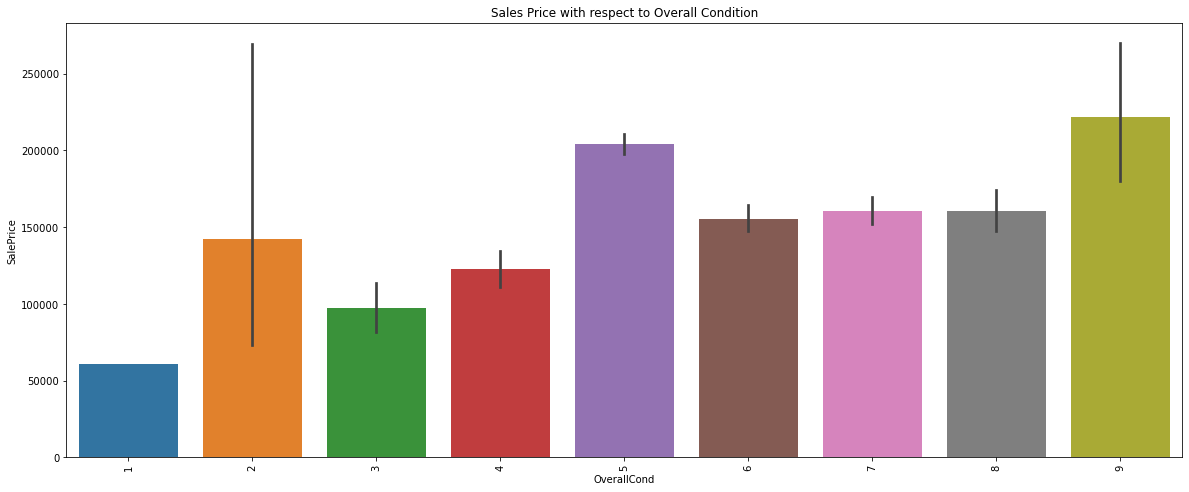

In [37]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

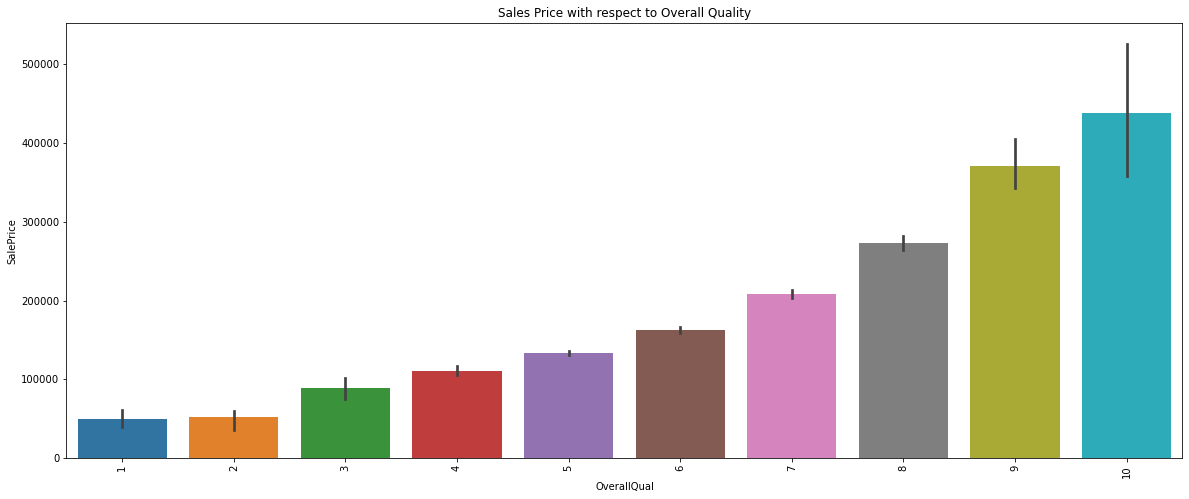

In [38]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

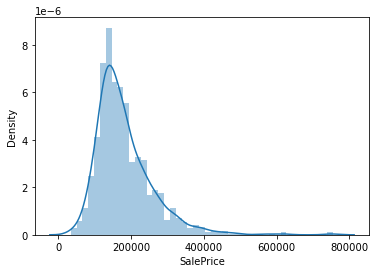

In [39]:
sns.distplot(df['SalePrice'])

In [40]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

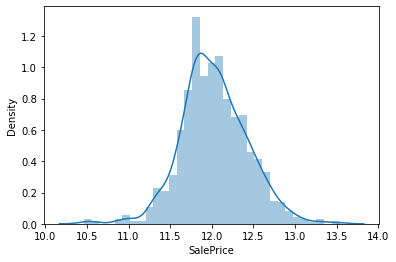

In [41]:
sns.distplot(df['SalePrice'])

In [42]:
# correlation matrix
cor = df_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.336234 -0.124151     0.070462    -0.056978   
LotFrontage     -0.336234     1.000000  0.296790     0.229981    -0.047851   
LotArea         -0.124151     0.296790  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.229981  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.047851  0.017513    -0.083167     1.000000   
YearBuilt        0.023988     0.112000  0.005506     0.575800    -0.377731   
YearRemodAdd     0.056618     0.089513  0.027228     0.555945     0.080669   
MasVnrArea       0.028215     0.188273  0.120192     0.403985    -0.135133   
BsmtFinSF1      -0.052236     0.227732  0.221851     0.219643    -0.028810   
BsmtFinSF2      -0.062403     0.001253  0.056656    -0.040893     0.044336   
BsmtUnfSF       -0.134170     0.115628  0.006600     0.308676    -0.146384   
TotalBsmtSF     -0.214042     0.356180  0.259733     0.528285    -0.162481   
1stFlrSF        -0.227927     0.402864  0.312843     0.458758    -0.134420   
2ndFlrSF         0.300366     0.089816  0.059803     0.316624     0.036668   
LowQualFinSF     0.053737     0.008087 -0.001915    -0.039295     0.041877   
GrLivArea        0.086448     0.374000  0.281360     0.599700    -0.065006   
BsmtFullBath     0.004556     0.092807  0.142387     0.101732    -0.039680   
BsmtHalfBath     0.008207     0.001375  0.059282    -0.030702     0.091016   
FullBath         0.140807     0.171842  0.123197     0.548824    -0.171931   
HalfBath         0.168423     0.047149  0.007271     0.296134    -0.052125   
BedroomAbvGr    -0.013283     0.236946  0.117351     0.099639     0.028393   
KitchenAbvGr     0.283506    -0.002082 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd     0.051179     0.318941  0.184546     0.432579    -0.039952   
Fireplaces      -0.035792     0.228494  0.285983     0.390067    -0.013632   
GarageYrBlt     -0.085403     0.105960  0.078849     0.294234     0.027716   
GarageCars      -0.027639     0.260224  0.158313     0.596322    -0.161996   
GarageArea      -0.092408     0.322750  0.195162     0.566782    -0.126021   
WoodDeckSF      -0.022609     0.087267  0.216720     0.227137     0.012290   
OpenPorchSF      0.017468     0.151044  0.093080     0.341030    -0.024899   
EnclosedPorch   -0.004252     0.021103 -0.007446    -0.098374     0.056074   
3SsnPorch       -0.043210     0.050499  0.025794     0.045919     0.040476   
ScreenPorch     -0.013291     0.030440  0.025256     0.059387     0.069463   
PoolArea         0.009583     0.195973  0.097107     0.072247    -0.003603   
MiscVal         -0.023503    -0.002830  0.051679    -0.025786     0.075178   
MoSold          -0.016015     0.022579  0.015141     0.090638     0.005519   
YrSold          -0.038595    -0.004162 -0.035399    -0.048759     0.055517   
SalePrice       -0.060775     0.323851  0.249499     0.789185    -0.065642   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.023988      0.056618    0.028215   -0.052236   -0.062403   
LotFrontage     0.112000      0.089513    0.188273    0.227732    0.001253   
LotArea         0.005506      0.027228    0.120192    0.221851    0.056656   
OverallQual     0.575800      0.555945    0.403985    0.219643   -0.040893   
OverallCond    -0.377731      0.080669   -0.135133   -0.028810    0.044336   
YearBuilt       1.000000      0.592829    0.318562    0.227933   -0.027682   
YearRemodAdd    0.592829      1.000000    0.178583    0.114430   -0.044694   
MasVnrArea      0.318562      0.178583    1.000000    0.263377   -0.064685   
BsmtFinSF1      0.227933      0.114430    0.263377    1.000000   -0.052145   
BsmtFinSF2     -0.027682     -0.044694   -0.064685   -0.052145    1.000000   
BsmtUnfSF       0.155559      0.174732    0.108974   -0.499861   -0.213580   
TotalBsmtSF     0.386265      0.280720    0.362330    0.518940    0.098167   
1stFlrSF        0.279450      0.2333

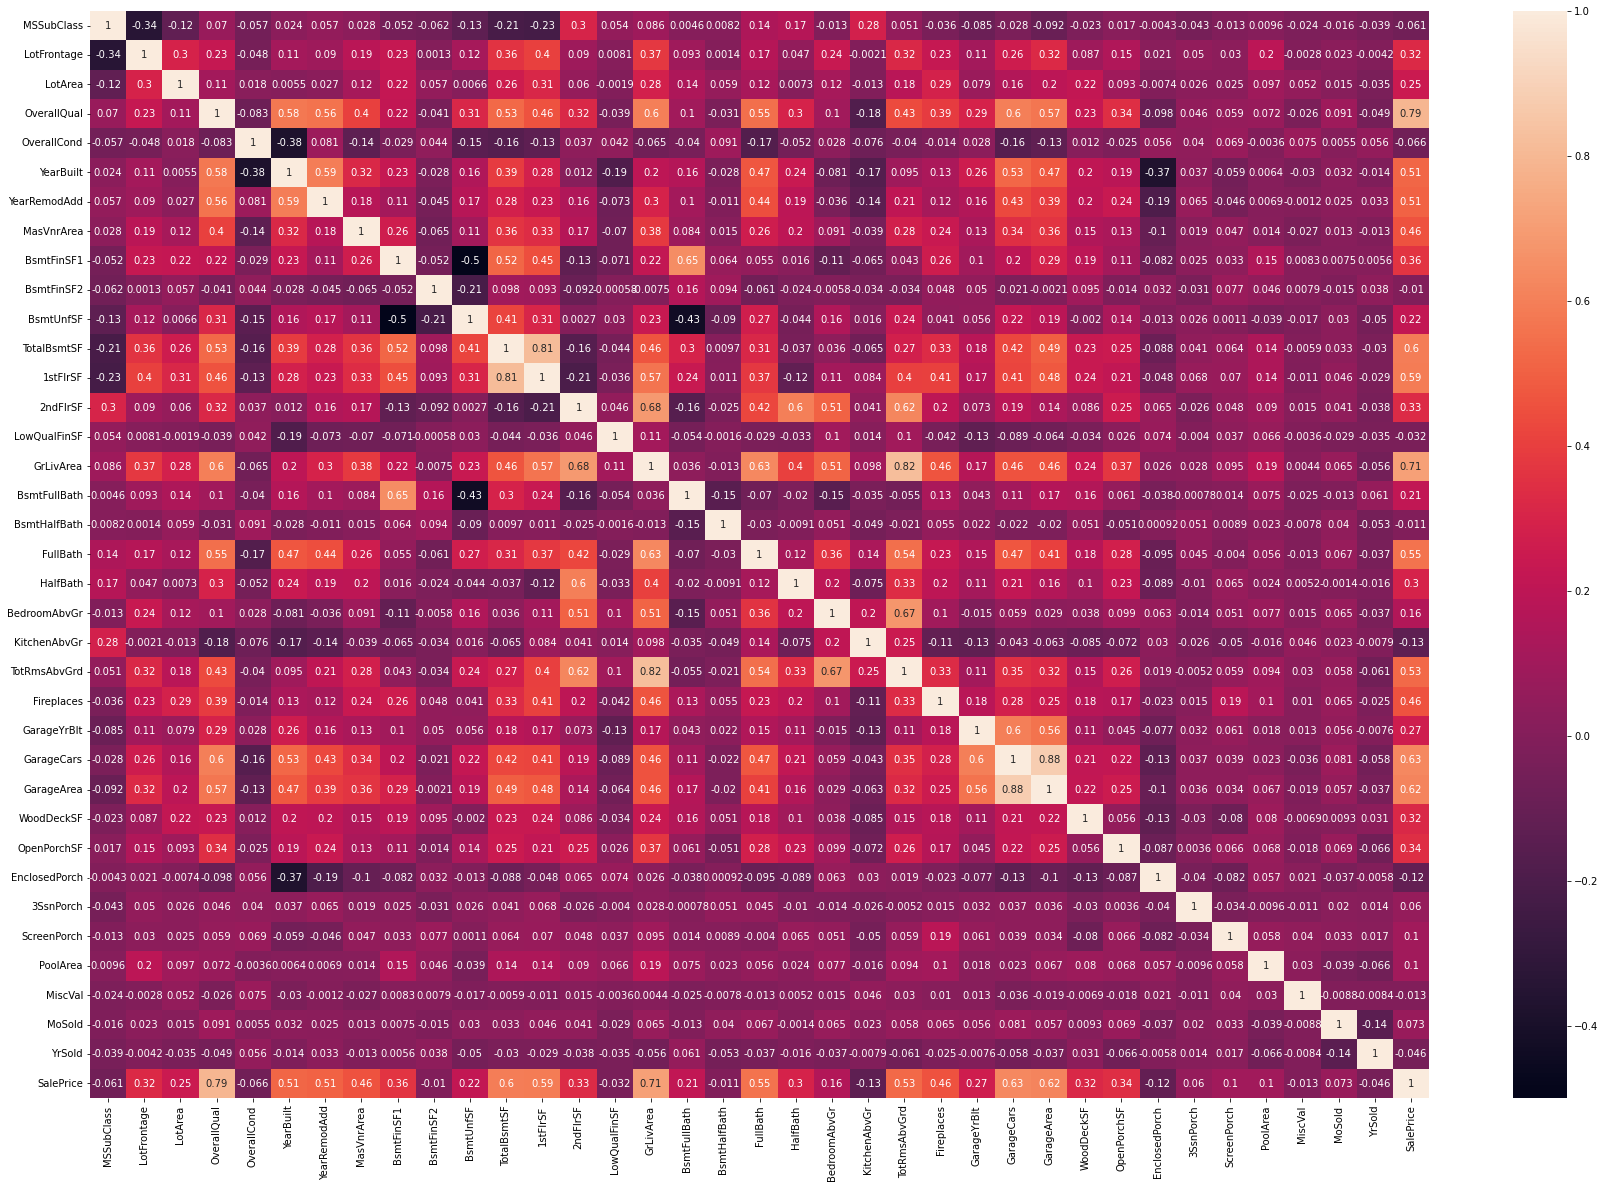

In [43]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

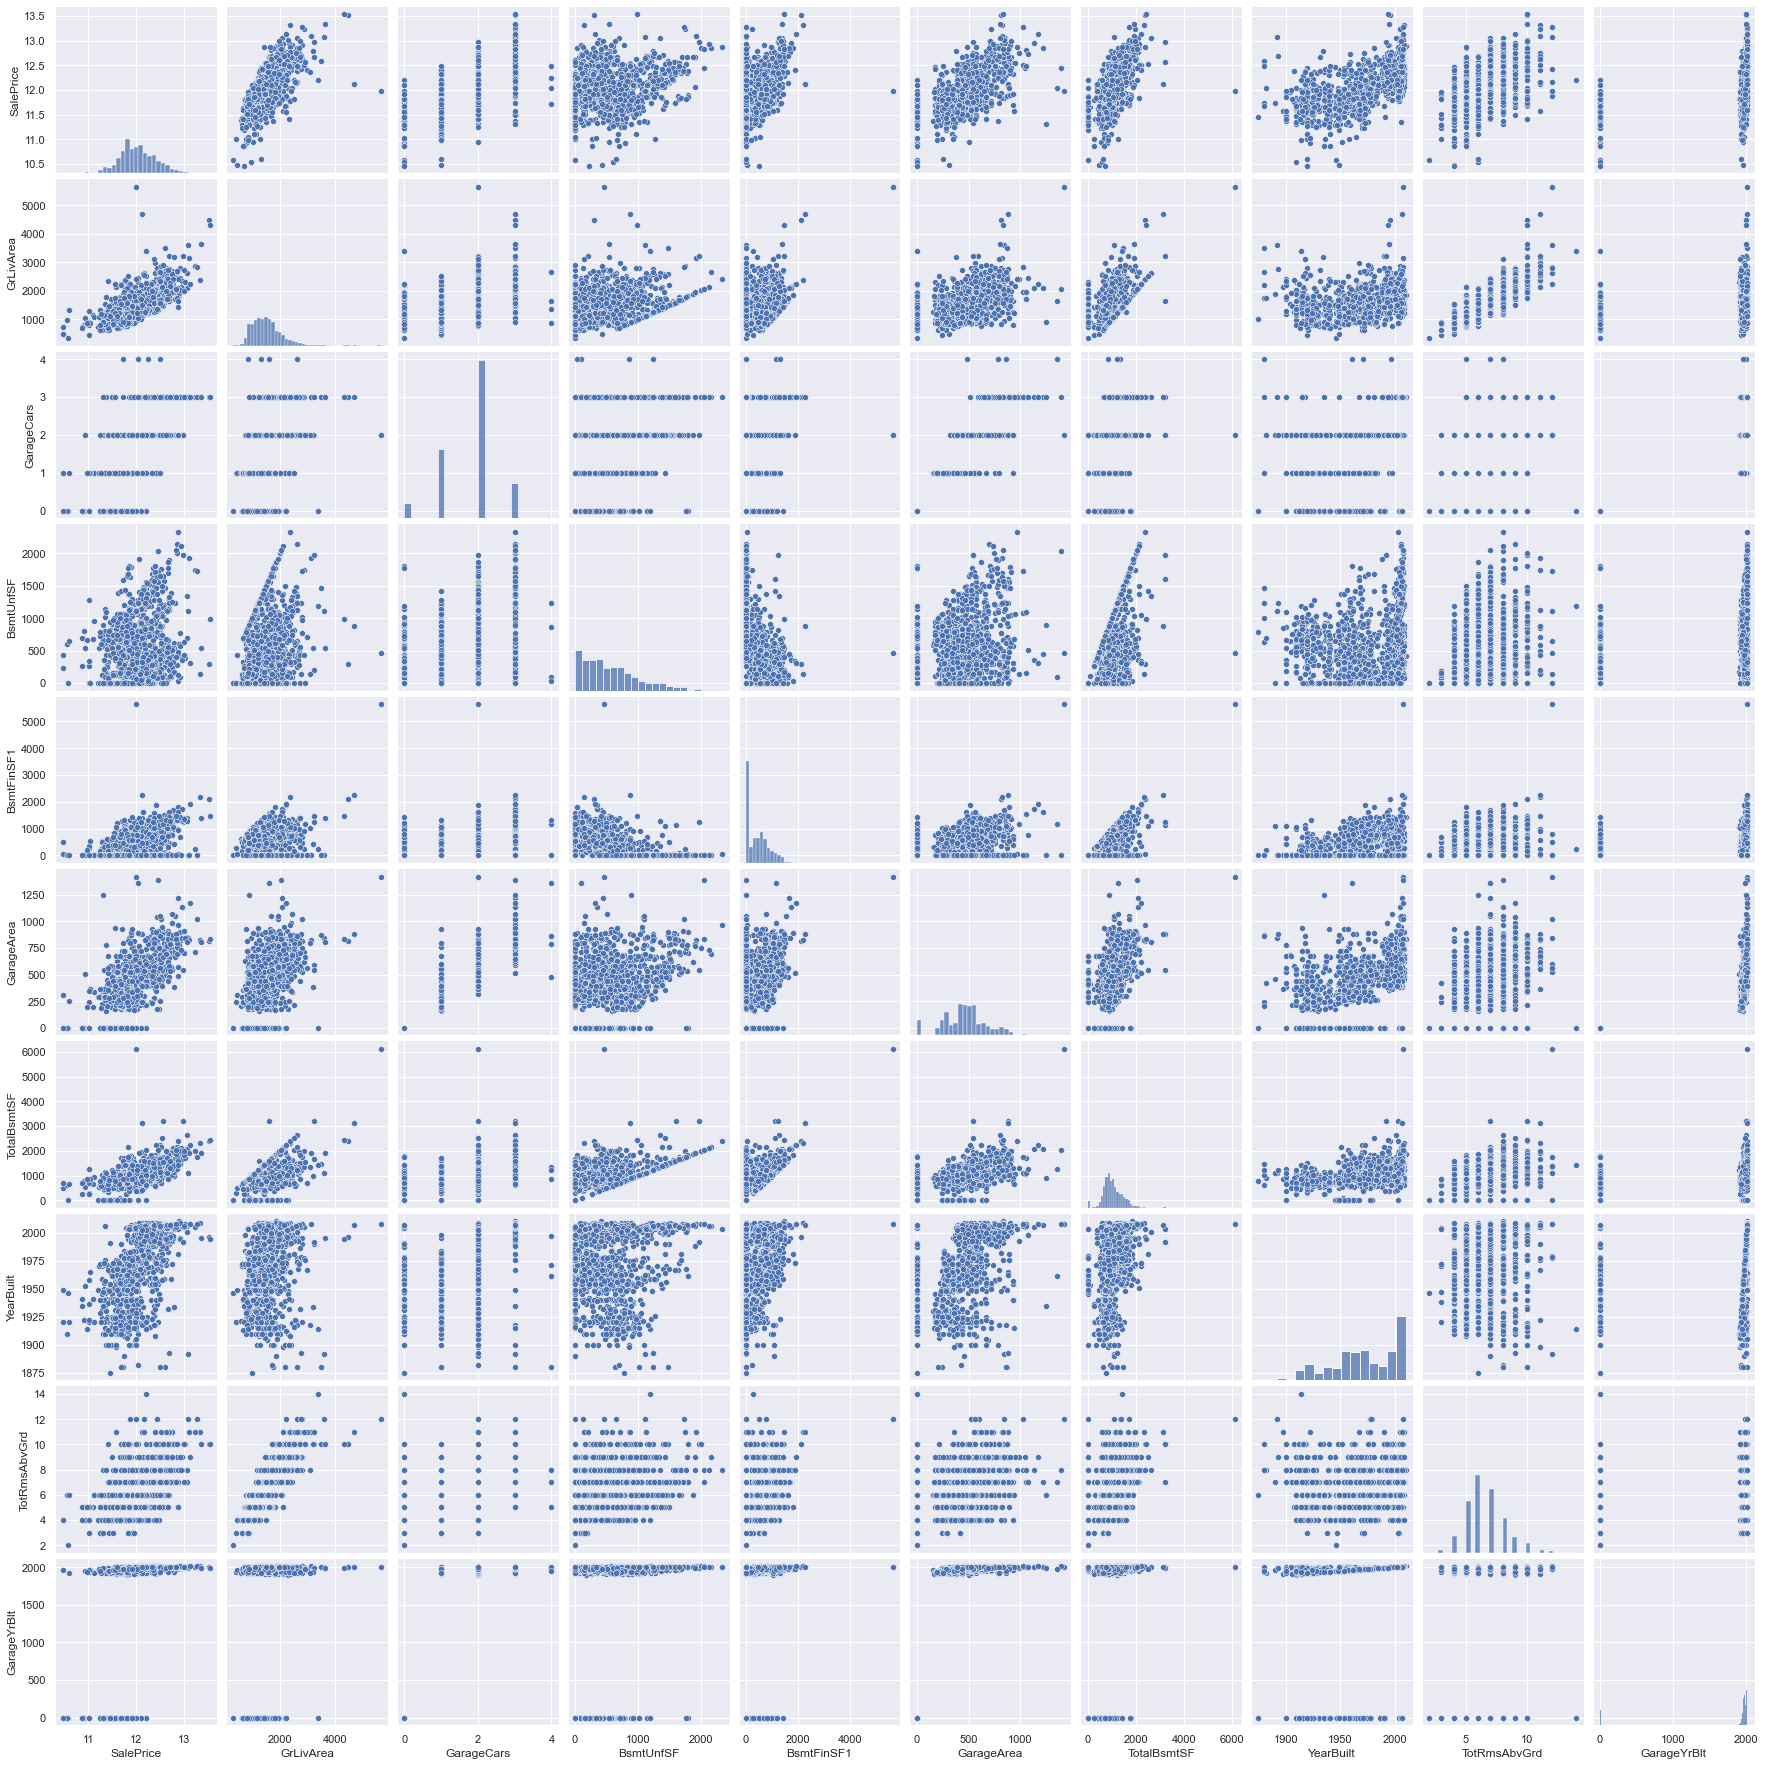

In [44]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [45]:
df = df.drop(['GarageCars'], axis = 1)
df = df.drop(['BsmtUnfSF'], axis = 1)
df = df.drop(['TotRmsAbvGrd'], axis = 1)
df = df.drop(['GarageYrBlt'], axis = 1)

In [46]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL         70.0     4928   Pave  None      IR1   
1  889          20       RL         95.0    15865   Pave  None      IR1   
2  793          60       RL         92.0     9920   Pave  None      IR1   
3  110          20       RL        105.0    11751   Pave  None      IR1   
4  422          20       RL         70.0    16635   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0   None   None        None       0   
1         Lvl    AllPub  ...        0   None   None        None       0   
2         Lvl    AllPub  ...        0   None   None        None       0   
3         Lvl    AllPub  ...        0   None  MnPrv        None       0   
4         Lvl    AllPub  ...        0   None   None        None       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal  11.759793  
1     10   2007        WD         Normal  12.498746  
2      6   2007        WD         Normal  12.505403  
3      1   2010       COD         Normal  12.154785  
4      6   2009        WD         Normal  12.278398  

[5 rows x 77 columns]

In [47]:
#Numeric columns
df.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127         120         70.0     4928            6            5   
1     889          20         95.0    15865            8            6   
2     793          60         92.0     9920            7            5   
3     110          20        105.0    11751            6            6   
4     422          20         70.0    16635            6            7   
...   ...         ...          ...      ...          ...          ...   
1163  289          20         70.0     9819            5            5   
1164  554          20         67.0     8777            4            5   
1165  196         160         24.0     2280            6            6   
1166   31          70         50.0     8500            4            4   
1167  617          60         70.0     7861            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          1976          1976         0.0         120  ...           0   
1          1970          1970         0.0         351  ...          81   
2          1996          1997         0.0         862  ...         180   
3          1977          1977       480.0         705  ...           0   
4          1977          2000       126.0        1246  ...         240   
...         ...           ...         ...         ...  ...         ...   
1163       1967          1967        31.0         450  ...           0   
1164       1949          2003         0.0           0  ...           0   
1165       1976          1976         0.0         566  ...          87   
1166       1920          1950         0.0           0  ...           0   
1167       2002          2003         0.0         457  ...         100   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0             205              0          0            0         0        0   
1             207              0          0          224         0        0   
2             130              0          0            0         0        0   
3             122              0          0            0         0        0   
4               0              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1163            0              0          0            0         0        0   
1164           96              0          0            0         0        0   
1165            0              0          0            0         0        0   
1166           54            172          0            0         0        0   
1167           75              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2007  11.759793  
1         10    2007  12.498746  
2          6    2007  12.505403  
3          1    2010  12.154785  
4          6    2009  12.278398  
...      ...     ...        ...  
1163       2    2010  11.711785  
1164       5    2009  11.589896  
1165       7    2009  11.908347  
1166       7    2008  10.596660  
1167       6    2006  12.118339  

[1168 rows x 34 columns]

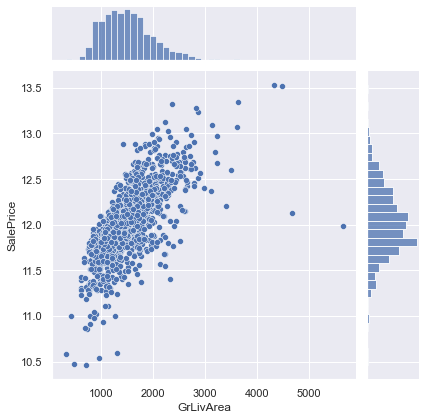

In [48]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

In [49]:
df.shape

(1168, 77)

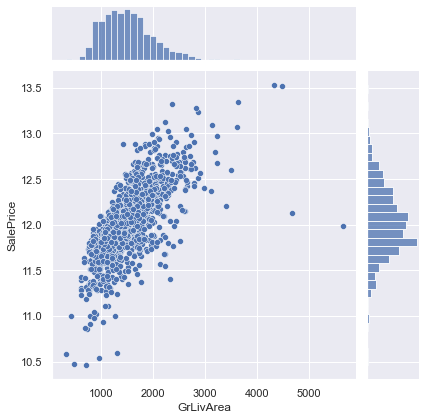

In [50]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = df['GrLivArea'], y = df['SalePrice'])
plt.show()

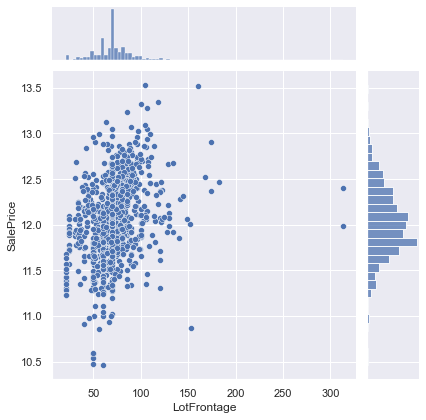

In [51]:
# Lot frontage vs SalePrice 
sns.jointplot(x = df['LotFrontage'], y = df['SalePrice'])
plt.show()

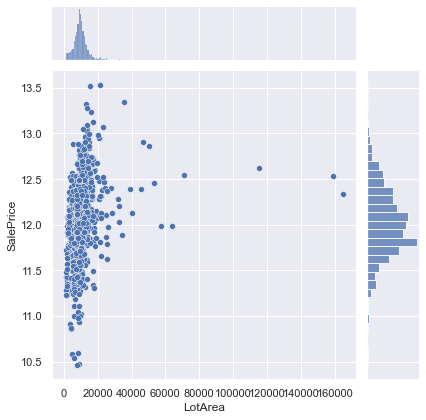

In [52]:
# LotArea vs SalePrice
sns.jointplot(x = df['LotArea'], y = df['SalePrice'])
plt.show()

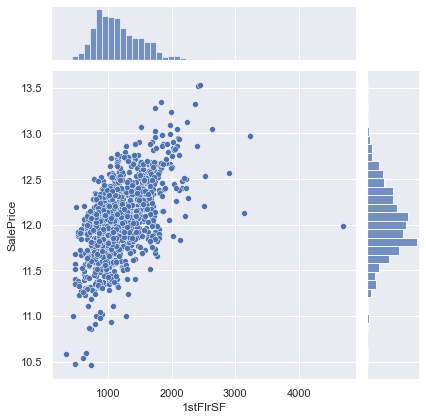

In [53]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = df['1stFlrSF'], y = df['SalePrice'])
plt.show()

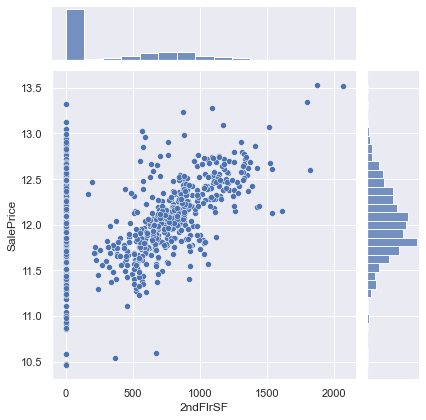

In [54]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = df['2ndFlrSF'], y = df['SalePrice'])
plt.show()

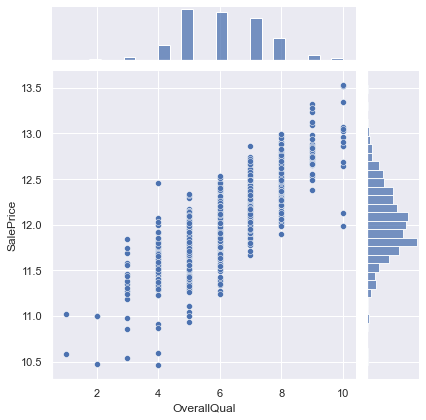

In [55]:
# OverallQual vs SalePrice
sns.jointplot(x = df['OverallQual'], y = df['SalePrice'])
plt.show()

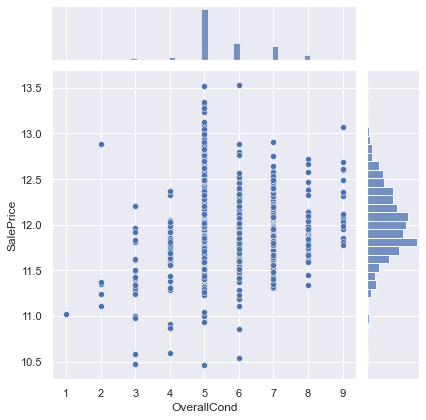

In [56]:
# OverallCond vs SalePrice
sns.jointplot(x=df['OverallCond'], y = df['SalePrice'])
plt.show()

In [57]:
# PropAge -  Property Age from yearsold - yearbuilt
df['PropAge'] = (df['YrSold'] - df['YearBuilt'])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL         70.0     4928   Pave  None      IR1   
1  889          20       RL         95.0    15865   Pave  None      IR1   
2  793          60       RL         92.0     9920   Pave  None      IR1   
3  110          20       RL        105.0    11751   Pave  None      IR1   
4  422          20       RL         70.0    16635   Pave  None      IR1   

  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...   None   None        None       0      2   2007   
1         Lvl    AllPub  ...   None   None        None       0     10   2007   
2         Lvl    AllPub  ...   None   None        None       0      6   2007   
3         Lvl    AllPub  ...   None  MnPrv        None       0      1   2010   
4         Lvl    AllPub  ...   None   None        None       0      6   2009   

  SaleType  SaleCondition  SalePrice  PropAge  
0       WD         Normal  11.759793       31  
1       WD         Normal  12.498746       37  
2       WD         Normal  12.505403       11  
3      COD         Normal  12.154785       33  
4       WD         Normal  12.278398       32  

[5 rows x 78 columns]

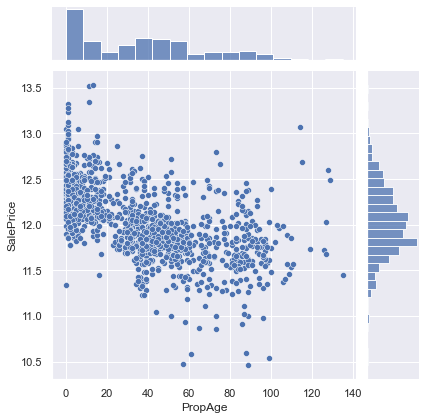

In [58]:
sns.jointplot(x = df['PropAge'], y = df['SalePrice'])
plt.show()

# Now we can drop the column 'Month sold' and 'Year Sold', 'Year built' and 'Year remodelled' as it will not be required further

In [59]:
df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL         70.0     4928   Pave  None      IR1   
1  889          20       RL         95.0    15865   Pave  None      IR1   
2  793          60       RL         92.0     9920   Pave  None      IR1   
3  110          20       RL        105.0    11751   Pave  None      IR1   
4  422          20       RL         70.0    16635   Pave  None      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0   None   None        None   
1         Lvl    AllPub  ...         224        0   None   None        None   
2         Lvl    AllPub  ...           0        0   None   None        None   
3         Lvl    AllPub  ...           0        0   None  MnPrv        None   
4         Lvl    AllPub  ...           0        0   None   None        None   

  MiscVal SaleType  SaleCondition  SalePrice PropAge  
0       0       WD         Normal  11.759793      31  
1       0       WD         Normal  12.498746      37  
2       0       WD         Normal  12.505403      11  
3       0      COD         Normal  12.154785      33  
4       0       WD         Normal  12.278398      32  

[5 rows x 74 columns]

In [60]:
df.Street.value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [61]:
df.Utilities.value_counts()

AllPub    1168
Name: Utilities, dtype: int64

In [62]:
# We can also drop columns that show very low variance and thus not required for predictions
df = df.drop(['Street'], axis = 1)
df = df.drop(['Utilities'], axis = 1)

In [63]:
# l1 = ['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional']
l2= df.select_dtypes(include=['float64', 'int64'])
l2

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127         120         70.0     4928            6            5   
1     889          20         95.0    15865            8            6   
2     793          60         92.0     9920            7            5   
3     110          20        105.0    11751            6            6   
4     422          20         70.0    16635            6            7   
...   ...         ...          ...      ...          ...          ...   
1163  289          20         70.0     9819            5            5   
1164  554          20         67.0     8777            4            5   
1165  196         160         24.0     2280            6            6   
1166   31          70         50.0     8500            4            4   
1167  617          60         70.0     7861            6            5   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  ...  GarageArea  \
0            0.0         120           0         1078  ...         440   
1            0.0         351         823         2217  ...         621   
2            0.0         862           0         1117  ...         455   
3          480.0         705           0         1844  ...         546   
4          126.0        1246           0         1602  ...         529   
...          ...         ...         ...          ...  ...         ...   
1163        31.0         450           0          882  ...         280   
1164         0.0           0           0            0  ...         520   
1165         0.0         566           0          855  ...         440   
1166         0.0           0           0          649  ...         250   
1167         0.0         457           0          783  ...         393   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0          205              0          0            0   
1             81          207              0          0          224   
2            180          130              0          0            0   
3              0          122              0          0            0   
4            240            0              0          0            0   
...          ...          ...            ...        ...          ...   
1163           0            0              0          0            0   
1164           0           96              0          0            0   
1165          87            0              0          0            0   
1166           0           54            172          0            0   
1167         100           75              0          0            0   

      PoolArea  MiscVal  SalePrice  PropAge  
0            0        0  11.759793       31  
1            0        0  12.498746       37  
2            0        0  12.505403       11  
3            0        0  12.154785       33  
4            0        0  12.278398       32  
...        ...      ...        ...      ...  
1163         0        0  11.711785       43  
1164         0        0  11.589896       60  
1165         0        0  11.908347       33  
1166         0        0  10.596660       88  
1167         0        0  12.118339        4  

[1168 rows x 31 columns]

In [64]:
for i in l2:
    print(df[i].value_counts())

127     1
1391    1
1389    1
448     1
1179    1
       ..
1402    1
661     1
101     1
415     1
617     1
Name: Id, Length: 1168, dtype: int64
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
70.0     272
60.0     111
80.0      60
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
12803     1
9480      1
13478     1
12122     1
7861      1
Name: LotArea, Length: 892, dtype: int64
5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64
5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64
0.0      699
72.0       7
180.0      6
120.0      6

In [65]:
df = df.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [66]:
df.shape

(1168, 63)

In [67]:
# Drop 'Id' from Dataframe

df = df.drop(['Id'], axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0         120       RL         70.0     4928      IR1         Lvl    Inside   
1          20       RL         95.0    15865      IR1         Lvl    Inside   
2          60       RL         92.0     9920      IR1         Lvl   CulDSac   
3          20       RL        105.0    11751      IR1         Lvl    Inside   
4          20       RL         70.0    16635      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... OpenPorchSF EnclosedPorch  3SsnPorch  \
0       Gtl      NPkVill       Norm  ...         205             0          0   
1       Mod        NAmes       Norm  ...         207             0          0   
2       Gtl      NoRidge       Norm  ...         130             0          0   
3       Gtl       NWAmes       Norm  ...         122             0          0   
4       Gtl       NWAmes       Norm  ...           0             0          0   

   ScreenPorch PoolArea MiscFeature SaleType SaleCondition  SalePrice PropAge  
0            0        0        None       WD        Normal  11.759793      31  
1          224        0        None       WD        Normal  12.498746      37  
2            0        0        None       WD        Normal  12.505403      11  
3            0        0        None      COD        Normal  12.154785      33  
4            0        0        None       WD        Normal  12.278398      32  

[5 rows x 62 columns]

In [68]:
# Type of each feature in data: int, float, object
types = df.dtypes

# Numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)]

# Categorical values are type object
categorical_type = types[types == object]

In [69]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [70]:
# Converting numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [71]:
# Converting Categorical columns to a list 
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


# Creating Dummy variables for categorical variable to convert into numerical variable

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   LotShape       1168 non-null   object 
 5   LandContour    1168 non-null   object 
 6   LotConfig      1168 non-null   object 
 7   LandSlope      1168 non-null   object 
 8   Neighborhood   1168 non-null   object 
 9   Condition1     1168 non-null   object 
 10  BldgType       1168 non-null   object 
 11  HouseStyle     1168 non-null   object 
 12  OverallQual    1168 non-null   int64  
 13  OverallCond    1168 non-null   int64  
 14  RoofStyle      1168 non-null   object 
 15  Exterior1st    1168 non-null   object 
 16  Exterior2nd    1168 non-null   object 
 17  MasVnrType     1168 non-null   object 
 18  MasVnrAr

In [73]:
df = pd.get_dummies(df, drop_first=True )

In [74]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0         120         70.0     4928            6            5         0.0   
1          20         95.0    15865            8            6         0.0   
2          60         92.0     9920            7            5         0.0   
3          20        105.0    11751            6            6       480.0   
4          20         70.0    16635            6            7       126.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         120           0         1078       958  ...               0   
1         351         823         2217      2217  ...               0   
2         862           0         1117      1127  ...               0   
3         705           0         1844      1844  ...               0   
4        1246           0         1602      1602  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            0   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     1                      0  
4                     1                      0  

[5 rows x 209 columns]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 209 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(26), uint8(180)
memory usage: 470.1 KB


In [76]:
X = df.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0         120         70.0     4928            6            5         0.0   
1          20         95.0    15865            8            6         0.0   
2          60         92.0     9920            7            5         0.0   
3          20        105.0    11751            6            6       480.0   
4          20         70.0    16635            6            7       126.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         120           0         1078       958  ...               0   
1         351         823         2217      2217  ...               0   
2         862           0         1117      1127  ...               0   
3         705           0         1844      1844  ...               0   
4        1246           0         1602      1602  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            0   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     1                      0  
4                     1                      0  

[5 rows x 208 columns]

In [77]:
# Putting response variable to y
y = df['SalePrice']

y.head()

0    11.759793
1    12.498746
2    12.505403
3    12.154785
4    12.278398
Name: SalePrice, dtype: float64

In [78]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

In [80]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1110    1.544755    -0.038124 -0.758271     0.666103    -0.544716   -0.443146   
555     1.544755    -0.437446 -0.308843    -0.070306    -0.544716    0.824012   
500     0.097156    -0.038124  1.798233    -0.806714    -0.544716   -0.538982   
776     0.097156     0.183722  0.072947     0.666103    -0.544716    0.536505   
77     -0.264743    -0.925507 -0.565930    -0.806714     0.341804   -0.538982   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
1110   -0.955552   -0.303018     0.703881  0.617379  ...               0   
555    -0.912992   -0.303018     0.674777  0.485474  ...               0   
500    -0.425683    4.028508    -0.106541 -0.026925  ...               0   
776    -0.419299   -0.303018     0.206882 -0.044681  ...               0   
77     -0.708705   -0.303018    -0.762491 -0.932501  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1110               0             0             0            1   
555                0             0             0            1   
500                0             0             0            1   
776                0             0             0            1   
77                 0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1110                      0                     0                     0   
555                       0                     0                     0   
500                       0                     0                     0   
776                       0                     0                     0   
77                        0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1110                     1                      0  
555                      1                      0  
500                      0                      0  
776                      1                      0  
77                       1                      0  

[5 rows x 208 columns]

In [81]:
X_test.head()

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
220    -0.899134    -0.030959   0.241271    -0.770641     0.401896   
549     0.497824    -0.030959  -0.265626     0.598954    -0.496611   
809    -0.200655    -0.030959  -0.666591    -0.770641    -1.395117   
689    -0.899134    -0.391675  10.630640     0.598954    -0.496611   
1160    1.429129    -0.797481  -1.051272    -0.085844     0.401896   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  \
220    -0.611155    0.115459    -0.24268    -0.125863 -0.417631  ...   
549    -0.480335   -0.978020    -0.24268    -1.573026 -0.949760  ...   
809    -0.611155   -0.978020    -0.24268    -0.385610 -0.709780  ...   
689    -0.611155    0.495702    -0.24268     1.091702  0.951818  ...   
1160   -0.611155    0.279706    -0.24268     0.015607 -0.258514  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
220                0               0             0             0            1   
549                0               0             0             0            1   
809                0               0             0             0            1   
689                0               0             0             0            1   
1160               0               0             0             0            0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
220                       0                     0                     0   
549                       0                     0                     0   
809                       0                     0                     0   
689                       0                     0                     0   
1160                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
220                      1                      0  
549                      1                      0  
809                      1                      0  
689                      1                      0  
1160                     0                      0  

[5 rows x 208 columns]

# Model Building

Text(0.5, 1.0, 'House Price vs YearSold')

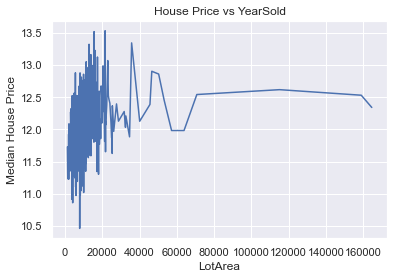

In [82]:
# Chekcing  median price changes with the year sold
df['LotArea'] = df['LotArea'].astype('int')
df.groupby('LotArea')['SalePrice'].median().plot()
plt.xlabel('LotArea')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

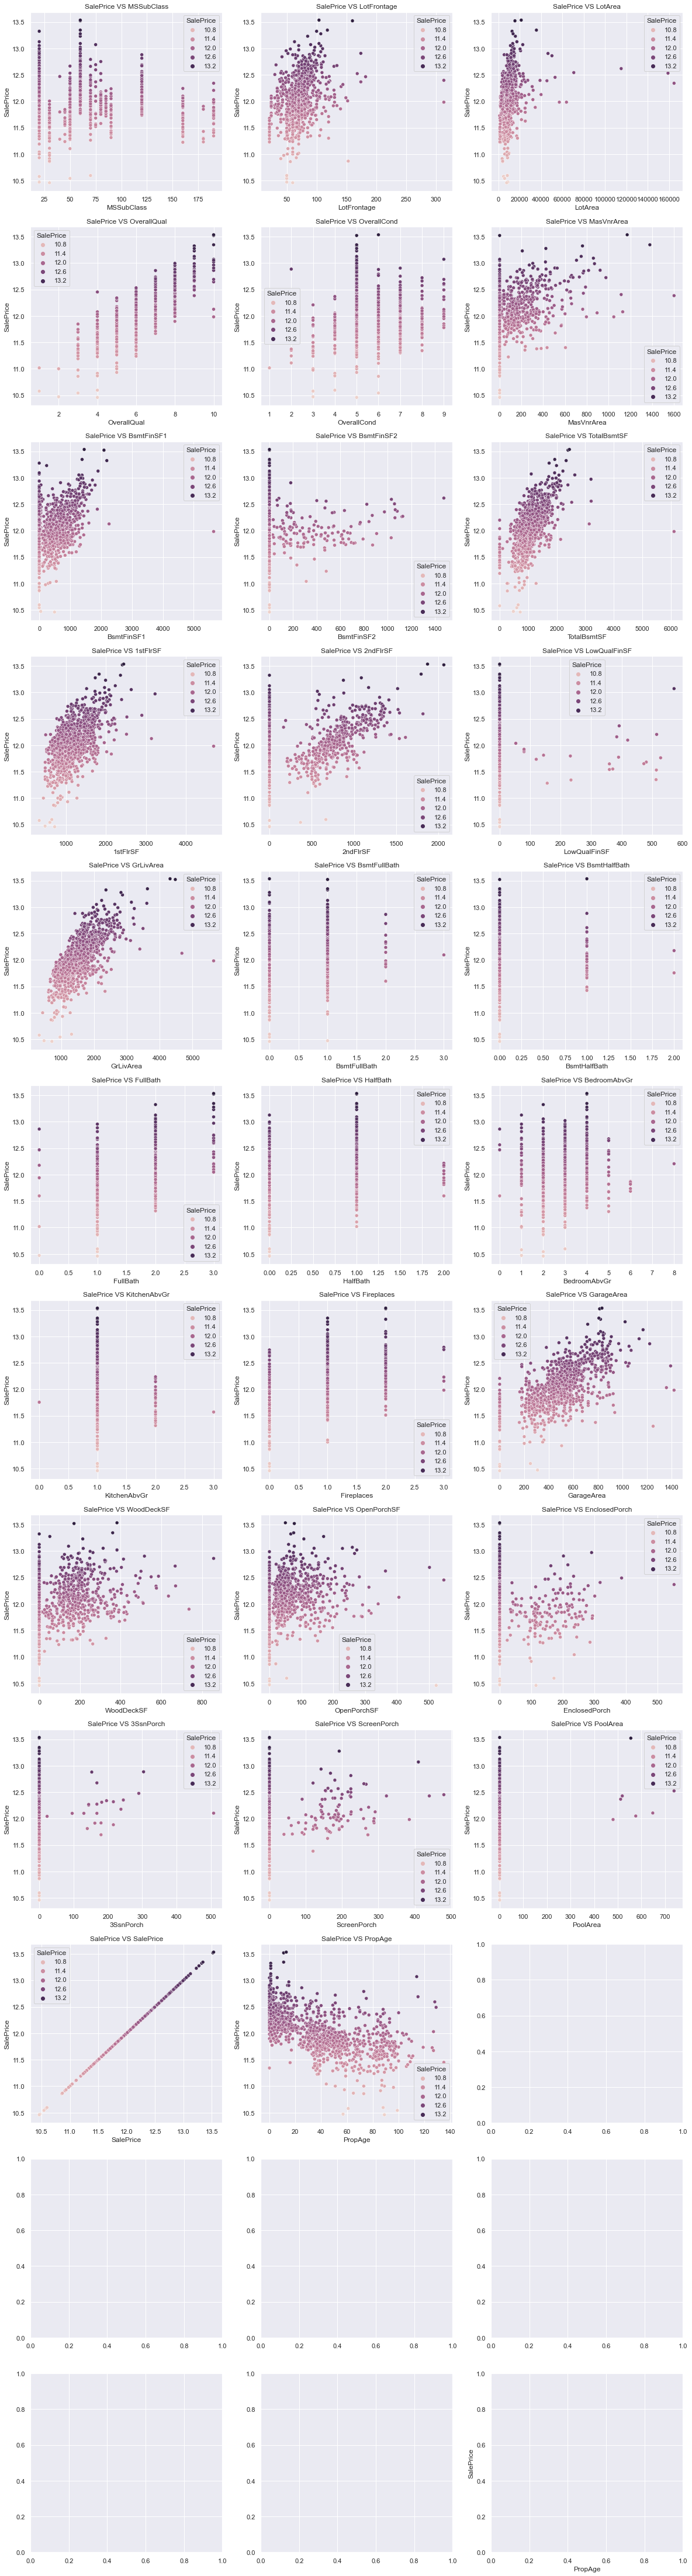

In [83]:
#Visualising numerical predictor variables with Target Variables
df_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

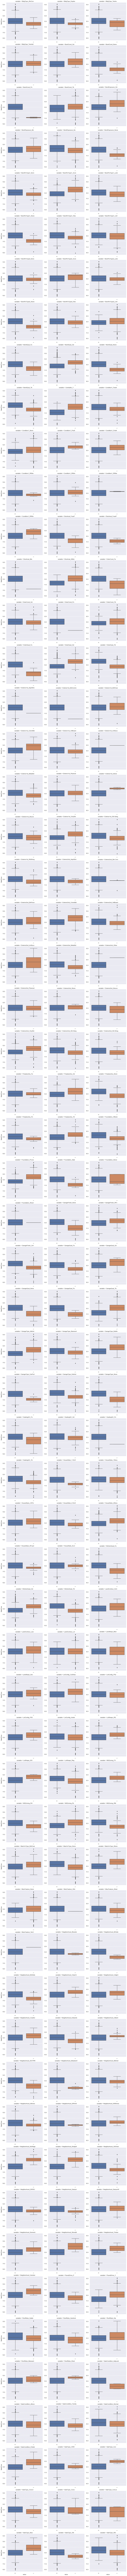

In [84]:
# Plotting the Sales Price with Categorical variables and Features
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

In [85]:
# Checking co-related features
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

OverallQual           ExterQual_TA            -0.647819
MasVnrArea            MasVnrType_None         -0.677435
BsmtFinSF1            BsmtFullBath             0.645126
                      BsmtFinType1_Unf        -0.622618
BsmtFinSF2            BsmtFinType2_Unf        -0.701166
                                                 ...   
SaleType_New          SaleCondition_Normal    -0.650360
                      SaleCondition_Partial    0.989764
SaleType_WD           SaleCondition_Normal     0.617576
                      SaleCondition_Partial   -0.767664
SaleCondition_Normal  SaleCondition_Partial   -0.657086
Length: 72, dtype: float64


In [86]:
X.drop(['OverallQual','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces',
        'WoodDeckSF',
        'MSZoning_FV','MSZoning_RL','Neighborhood_NPkVill','Condition1_Feedr','HouseStyle_1Story',
        'RoofStyle_Gable','Exterior2nd_BrkFace','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd',
        'ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd',
        'BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Fa',
        'GarageQual_Gd','MiscFeature_None','SaleType_New','SaleType_WD',
        'SaleCondition_Normal',
        'Foundation_PConc','Foundation_PConc'],
         axis=1,inplace=True)

In [87]:
X.shape

(1168, 156)

In [88]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

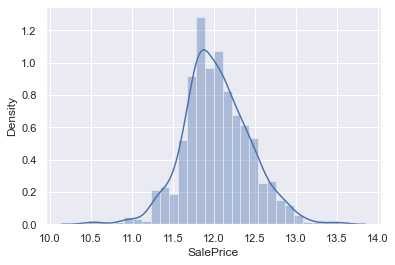

In [89]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

In [90]:
#Transforming the Target feature to make the data gaussian
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

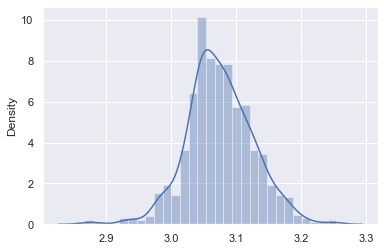

In [91]:
sns.distplot(y_train)
plt.show()

In [92]:
# Scaling the data using a Minmax Scaler
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns

X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [93]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallCond  LowQualFinSF  BsmtFullBath  \
0    0.235294     0.540373  0.085441        0.500           0.0      0.000000   
1    0.235294     0.316770  0.046544        0.500           0.0      0.000000   
2    0.294118     0.186335  0.030564        0.875           0.0      0.000000   
3    0.823529     0.086957  0.017229        0.500           0.0      0.000000   
4    0.235294     0.440994  0.055929        0.500           0.0      0.333333   

   BsmtHalfBath  GarageArea  OpenPorchSF  EnclosedPorch  ...  SaleType_CWD  \
0           0.0    0.560432     0.057361       0.000000  ...           0.0   
1           0.0    0.441727     0.086042       0.000000  ...           0.0   
2           0.0    0.129496     0.000000       0.271739  ...           0.0   
3           0.0    0.449640     0.103250       0.000000  ...           0.0   
4           0.0    0.607194     0.149140       0.000000  ...           0.0   

   SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_Oth  \
0           0.0             0.0             0.0             0.0           0.0   
1           1.0             0.0             0.0             0.0           0.0   
2           0.0             0.0             0.0             0.0           0.0   
3           0.0             0.0             0.0             0.0           0.0   
4           0.0             0.0             0.0             0.0           0.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Partial  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  

[5 rows x 156 columns]

# Ridge Regression

In [96]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

Fitting 11 folds for each of 28 candidates, totalling 308 fits


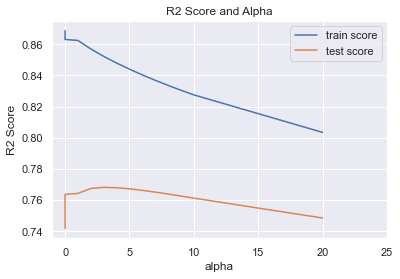

The optimum alpha is 3
The R2 Score of the model on the test dataset for optimum alpha is 0.7755613068348413
The MSE of the model on the test dataset for optimum alpha is 0.0005119448502021307


In [97]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

# outliers

In [98]:
# Chekcing the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

Features    VIF
115      BsmtFinType2_Unf  75.43
21        LandContour_Lvl  42.83
3             OverallCond  37.43
140         GarageQual_TA  36.01
120          CentralAir_Y  35.27
0              MSSubClass  32.62
82    Exterior1st_VinylSd  32.10
129      FireplaceQu_None  31.50
142          PavedDrive_Y  30.35
13                PropAge  27.83
124      Electrical_SBrkr  24.11
7              GarageArea  20.25
39     Neighborhood_NAmes  17.75
128        FireplaceQu_Gd  17.19
101           BsmtCond_TA  16.97
1             LotFrontage  16.87
51        Condition1_Norm  15.51
78    Exterior1st_MetalSd  14.85
76    Exterior1st_HdBoard  14.69
131        FireplaceQu_TA  14.66
83    Exterior1st_Wd Sdng  13.08
96           ExterCond_TA  13.02
43   Neighborhood_OldTown  12.88
61        BldgType_TwnhsE  11.53
32   Neighborhood_CollgCr  10.37

In [99]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)


Fitting 11 folds for each of 28 candidates, totalling 308 fits


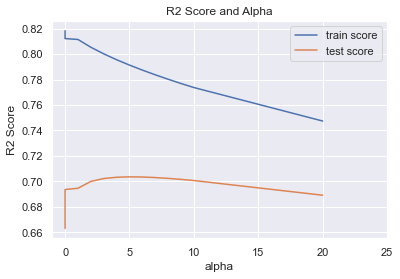

The optimum alpha is 5
The R2 Score of the model on the test dataset for optimum alpha is 0.7292057018849718
The MSE of the model on the test dataset for optimum alpha is 0.0006176820245610397


In [100]:
# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [101]:
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
Neighborhood_NoRidge             0.034181
LotArea                          0.030235
HouseStyle_2.5Fin                0.025876
Neighborhood_NridgHt             0.025321
Neighborhood_StoneBr             0.024121
HouseStyle_2.5Unf                0.019448
Neighborhood_Crawfor             0.018814
PoolArea                         0.017954
OpenPorchSF                      0.016749
LowQualFinSF                     0.016246
ScreenPorch                      0.016014
BsmtFullBath                     0.015799
HouseStyle_2Story                0.014441
BsmtExposure_Gd                  0.014075
MasVnrType_Stone                 0.011751
Exterior1st_BrkFace              0.010687
RoofStyle_Hip                    0.009881
Exterior1st_Plywood              0.009397
SaleCondition_Partial            0.009301
LotShape_IR2                     0.009005

# Lasso

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_selection import RFE

In [103]:
# Creating a model with an arbitrary alpha to understand the value ranges
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.7272955885425474
The MSE of the model on the test dataset for optimum alpha is 0.0006220389947214255


Fitting 11 folds for each of 11 candidates, totalling 121 fits


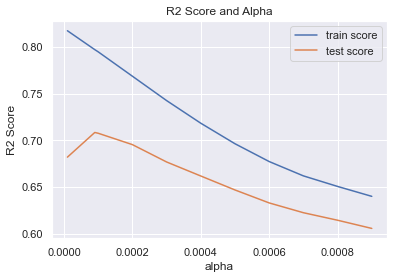

The optimum alpha is 9e-05
The R2 Score of the model on the test dataset for optimum alpha is 0.7269960841554308
The MSE of the model on the test dataset for optimum alpha is 0.0006227221644834434


In [104]:
# Builsing a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [105]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

Lasso Co-Efficient
LotArea                          0.095859
HouseStyle_2.5Fin                0.044224
Neighborhood_NoRidge             0.039717
Neighborhood_StoneBr             0.030833
Neighborhood_NridgHt             0.028978
HouseStyle_2.5Unf                0.025725
PoolArea                         0.020271
Neighborhood_Crawfor             0.020263
OpenPorchSF                      0.017184
BsmtFullBath                     0.017016
ScreenPorch                      0.016987
HouseStyle_2Story                0.014587
BsmtExposure_Gd                  0.012913
Exterior1st_BrkFace              0.011392
LowQualFinSF                     0.011172
MasVnrType_Stone                 0.010608
RoofStyle_Hip                    0.009732
Neighborhood_NWAmes              0.008598
Exterior1st_Plywood              0.008560
SaleCondition_Partial            0.008478

In [106]:
ridge_final2

Ridge(alpha=5, random_state=100)

In [107]:
lasso_final2

Lasso(alpha=9e-05, random_state=100)

In [108]:
ridge_double = Ridge(alpha=3,random_state=100)
ridge_double.fit(X_train_rfe2,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train_rfe2.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.7281139866809513
The MSE of the model on the test dataset for doubled alpha is 0.0006201722278709228
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
LotArea                                       0.042355
Neighborhood_NoRidge                          0.037347
HouseStyle_2.5Fin                             0.032168
Neighborhood_StoneBr                          0.027593
Neighborhood_NridgHt                          0.027548
HouseStyle_2.5Unf                             0.025229
PoolArea                                      0.023455
Neighborhood_Crawfor                          0.020739
LowQualFinSF                                  0.017798
OpenPorchSF                                   0.017414
ScreenPorch                                   0.017148
BsmtFullBath                                  0.016962
HouseStyle_2Story                             0.014633
BsmtExposure_Gd                               0.013823
3SsnPorch                                     0.012220
Exterior1st_BrkFace                           0.011962
MasVnrType_Stone                              0.011639
SaleType_CWD                                  0.010800
Neighborhood_Veenker                          0.010392
Neighborhood_ClearCr                          0.009607

In [109]:
# Building Lasso Model by doubling the value of alpha to 0.0002
lasso_double = Lasso(alpha=0.0001,random_state=100)
lasso_double.fit(X_train_rfe2,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train_rfe2.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.7272955885425474
The MSE of the model on the test dataset for doubled alpha is 0.0006220389947214255
The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
LotArea                                        0.090521
HouseStyle_2.5Fin                              0.043084
Neighborhood_NoRidge                           0.039495
Neighborhood_StoneBr                           0.030236
Neighborhood_NridgHt                           0.028639
HouseStyle_2.5Unf                              0.023878
Neighborhood_Crawfor                           0.019925
PoolArea                                       0.018159
OpenPorchSF                                    0.017365
ScreenPorch                                    0.016668
BsmtFullBath                                   0.016445
HouseStyle_2Story                              0.014498
BsmtExposure_Gd                                0.012940
Exterior1st_BrkFace                            0.010916
LowQualFinSF                                   0.010789
MasVnrType_Stone                               0.010611
RoofStyle_Hip                                  0.009876
SaleCondition_Partial                          0.008540
Exterior1st_Plywood                            0.008501
Neighborhood_NWAmes                            0.008474

In [110]:
#Removing the 5 most important predictor variables from the incoming dataset
#X_test_rfe3 = X_test_rfe2.drop(['GarageArea','TotRmsAbvGrd','OverallCond','LotArea'],axis=1)
#X_train_rfe3 = X_train_rfe2.drop(['GarageArea','TotRmsAbvGrd','OverallCond','LotArea'],axis=1)

# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.0001,random_state=100)
lasso3.fit(X_train,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.7738188142541031
The MSE of the model on the test dataset is 0.0005159194772623938
The most important predictor variables are as follows:


Lasso Co-Efficient
GarageArea                      0.065382
LotArea                         0.042884
HouseStyle_2.5Fin               0.036922
OverallCond                     0.033255
Neighborhood_StoneBr            0.031793

In [111]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([[ 8.05517337e-03,  2.24219936e-02,  3.71353051e-02,
         3.09318485e-02,  1.25093872e-02,  1.16896410e-02,
        -1.44052838e-03,  5.23258879e-02,  1.39651991e-02,
         5.70053203e-04,  1.23324393e-02,  1.31756937e-02,
         2.09836918e-02, -2.42910759e-02,  3.86392046e-03,
        -4.29402347e-03,  7.51521522e-03,  2.97594691e-03,
        -6.47146722e-04,  7.15388837e-03, -5.61798334e-03,
         6.27491723e-03,  6.33442447e-03, -5.75246052e-03,
         0.00000000e+00,  2.67129405e-04, -1.36014890e-03,
        -1.10151572e-02, -9.22251932e-03, -6.34431385e-03,
        -2.00800452e-03,  5.26156234e-03, -4.89017678e-03,
         1.23405206e-02, -1.43959743e-02, -1.27430566e-02,
        -2.10061173e-02, -2.70891405e-02, -8.42682987e-03,
        -8.97312127e-03, -1.31879026e-03,  2.52268865e-02,
         1.66442043e-02, -1.18991200e-02,  6.09560593e-03,
        -5.76393136e-03, -5.43094909e-03,  4.56248440e-03,
         3.02110809e-02, -1.85065167e-04,  5.31318739e-0

In [112]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', (array([3.04360654]), 3)),
 ('MSSubClass',
  (array([ 8.05517337e-03,  2.24219936e-02,  3.71353051e-02,  3.09318485e-02,
           1.25093872e-02,  1.16896410e-02, -1.44052838e-03,  5.23258879e-02,
           1.39651991e-02,  5.70053203e-04,  1.23324393e-02,  1.31756937e-02,
           2.09836918e-02, -2.42910759e-02,  3.86392046e-03, -4.29402347e-03,
           7.51521522e-03,  2.97594691e-03, -6.47146722e-04,  7.15388837e-03,
          -5.61798334e-03,  6.27491723e-03,  6.33442447e-03, -5.75246052e-03,
           0.00000000e+00,  2.67129405e-04, -1.36014890e-03, -1.10151572e-02,
          -9.22251932e-03, -6.34431385e-03, -2.00800452e-03,  5.26156234e-03,
          -4.89017678e-03,  1.23405206e-02, -1.43959743e-02, -1.27430566e-02,
          -2.10061173e-02, -2.70891405e-02, -8.42682987e-03, -8.97312127e-03,
          -1.31879026e-03,  2.52268865e-02,  1.66442043e-02, -1.18991200e-02,
           6.09560593e-03, -5.76393136e-03, -5.43094909e-03,  4.56248440e-03,
       

In [113]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8541576255545921
0.7715698376052694


In [114]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.022826506410601147


In [115]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.014444        -0.016934                1
1       0.0002         -0.015603        -0.017547                2
2       0.0003         -0.016624        -0.018130                3
3       0.0004         -0.017615        -0.018856                4
4       0.0005         -0.018436        -0.019531                5
5        0.001         -0.020164        -0.020906                6
6        0.002         -0.022723        -0.023206                7
7        0.003         -0.025567        -0.025848                8
8        0.004         -0.026429        -0.026596                9
9        0.005         -0.027237        -0.027396               10
10        0.01         -0.033806        -0.033865               11

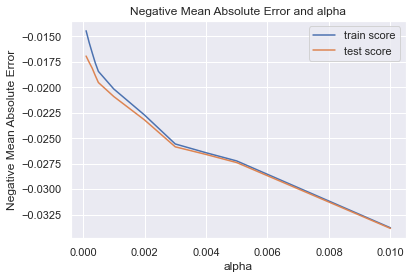

In [117]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [118]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [119]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.        ,  0.01243789,  0.        ,  0.01270386,  0.        ,
        0.        , -0.        ,  0.07458099,  0.00496409, -0.        ,
        0.        ,  0.        ,  0.        , -0.00255549,  0.        ,
       -0.01030262,  0.        , -0.        , -0.00228306,  0.        ,
       -0.        ,  0.        ,  0.004054  , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.00328536, -0.00475728,
       -0.        , -0.00905106, -0.00236021, -0.        , -0.00161574,
        0.        ,  0.01830225,  0.00835962, -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.01155223,  0.        ,
        0.        ,  0.00119845,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.00236269, -0.0038636 , -0.        ,  0.        ,  0.        ,
        0.01160692, -0.00253935, -0.        , -0.        ,  0.00

In [120]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.0006140259931742118

In [121]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0             LotFrontage       0.0124
1             OverallCond       0.0127
2              GarageArea       0.0746
3             OpenPorchSF       0.0050
4                 PropAge      -0.0026
5             MSZoning_RM      -0.0103
6            LotShape_Reg      -0.0023
7       LotConfig_CulDSac       0.0041
8    Neighborhood_Crawfor       0.0033
9    Neighborhood_Edwards      -0.0048
10    Neighborhood_IDOTRR      -0.0091
11   Neighborhood_MeadowV      -0.0024
12     Neighborhood_NAmes      -0.0016
13   Neighborhood_NoRidge       0.0183
14   Neighborhood_NridgHt       0.0084
15   Neighborhood_StoneBr       0.0116
16        Condition1_Norm       0.0012
17         BldgType_Twnhs      -0.0024
18        BldgType_TwnhsE      -0.0039
19      HouseStyle_2Story       0.0116
20      HouseStyle_SFoyer      -0.0025
21          RoofStyle_Hip       0.0077
22    Exterior1st_HdBoard      -0.0022
23     MasVnrType_BrkFace       0.0011
24       MasVnrType_Stone       0.0082
25            BsmtQual_Fa      -0.0003
26            BsmtQual_TA      -0.0054
27            BsmtCond_TA       0.0019
28        BsmtExposure_Gd       0.0107
29        BsmtExposure_No      -0.0025
30       BsmtFinType1_GLQ       0.0107
31      BsmtFinType2_None      -0.0097
32           HeatingQC_Gd      -0.0002
33           HeatingQC_TA      -0.0043
34           CentralAir_Y       0.0148
35         KitchenQual_Fa      -0.0086
36         KitchenQual_TA      -0.0162
37         FireplaceQu_Gd       0.0025
38       FireplaceQu_None      -0.0175
39      GarageType_Detchd      -0.0073
40       GarageFinish_RFn      -0.0008
41       GarageFinish_Unf      -0.0033
42        GarageQual_None      -0.0055
43           PavedDrive_Y       0.0062
44  SaleCondition_Partial       0.0058

In [122]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.0,
 'LotFrontage': 0.012437891204987242,
 'LotArea': 0.0,
 'OverallCond': 0.012703858706839932,
 'LowQualFinSF': 0.0,
 'BsmtFullBath': 0.0,
 'BsmtHalfBath': -0.0,
 'GarageArea': 0.07458099099778381,
 'OpenPorchSF': 0.004964094797570133,
 'EnclosedPorch': -0.0,
 '3SsnPorch': 0.0,
 'ScreenPorch': 0.0,
 'PoolArea': 0.0,
 'PropAge': -0.0025554874036386845,
 'MSZoning_RH': 0.0,
 'MSZoning_RM': -0.01030261685988765,
 'LotShape_IR2': 0.0,
 'LotShape_IR3': -0.0,
 'LotShape_Reg': -0.0022830626592248134,
 'LandContour_HLS': 0.0,
 'LandContour_Low': -0.0,
 'LandContour_Lvl': 0.0,
 'LotConfig_CulDSac': 0.004053997623775309,
 'LotConfig_FR2': -0.0,
 'LotConfig_FR3': 0.0,
 'LotConfig_Inside': -0.0,
 'LandSlope_Mod': -0.0,
 'LandSlope_Sev': -0.0,
 'Neighborhood_Blueste': -0.0,
 'Neighborhood_BrDale': -0.0,
 'Neighborhood_BrkSide': 0.0,
 'Neighborhood_ClearCr': 0.0,
 'Neighborhood_CollgCr': -0.0,
 'Neighborhood_Crawfor': 0.003285360732713139,
 'Neighborhood_Edwards': -0.0047572846562

In [127]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

Features  rfe_support  rfe_ranking  Coefficient
7              GarageArea         True            1     0.074581
41   Neighborhood_NoRidge         True            1     0.018302
120          CentralAir_Y         True            1     0.014839
3             OverallCond         True            1     0.012704
1             LotFrontage         True            1     0.012438
65      HouseStyle_2Story         True            1     0.011607
48   Neighborhood_StoneBr         True            1     0.011552
106      BsmtFinType1_GLQ         True            1     0.010692
102       BsmtExposure_Gd         True            1     0.010668
42   Neighborhood_NridgHt         True            1     0.008360

In [128]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)

#enr=elasticnet()

enr.fit(X_train,y_train)
enrpred=enr.predict(X_test)

print(enr.score(X_train,y_train))
enr.coef_

0.8517555492088522


array([ 9.90581702e-03,  2.13611038e-02,  7.06884392e-02,  3.69107420e-02,
        4.73468749e-03,  1.11475170e-02, -0.00000000e+00,  6.34795417e-02,
        1.23352799e-02,  0.00000000e+00,  7.54732151e-03,  1.22272271e-02,
        2.49726395e-02, -3.49119304e-02,  0.00000000e+00, -3.61526989e-03,
        3.07793986e-03,  0.00000000e+00, -0.00000000e+00,  5.10434159e-03,
       -5.78436255e-03,  5.65384329e-03,  4.89226451e-03, -3.76333131e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.02636830e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  2.59868161e-03,
       -2.35803199e-03,  1.55826929e-02, -1.15693054e-02, -9.63328542e-03,
       -2.11599060e-02, -2.62348492e-02, -5.30199137e-03, -7.28065619e-03,
        0.00000000e+00,  2.68416623e-02,  1.73114924e-02, -9.08420926e-03,
        7.37912096e-03, -3.33981417e-03, -1.55463460e-03,  5.49835539e-03,
        3.37095710e-02,  0.00000000e+00,  0.00000000e+00,  3.82999240e-03,
        0.00000000e+00,  

In [130]:
#from sklearn.externals import joblib

import joblib#Joblib provides a better way to avoid recomputing the same function repetitively saving a lot of time and computational cost

#save the model as a object file

joblib.dump(enr,'housing.obj')
#load the model from the file

enr_from_joblib=joblib.load('housing.obj')

#use the loaded model to make predictions

enr_from_joblib.predict(X_test)

array([3.0556344 , 3.04300763, 3.0505124 , 3.10286846, 3.06600138,
       3.06840039, 3.06106244, 3.11242484, 3.10201878, 2.92325702,
       3.11431659, 3.08170651, 3.06877199, 3.03830463, 3.09052469,
       3.02430694, 3.04681928, 3.03823044, 3.04552771, 3.06350163,
       3.05948364, 3.12903926, 3.01269036, 3.16046819, 3.06389217,
       3.06969036, 3.08727306, 3.02711717, 3.11763101, 3.09122569,
       3.03296594, 3.06956946, 3.0806676 , 3.09036489, 3.10333285,
       3.06252508, 3.0918791 , 3.05950189, 3.01234514, 3.09118472,
       3.06801192, 3.05468837, 3.09240523, 3.02666952, 3.0651412 ,
       3.00829194, 3.04295341, 3.07145648, 3.08792347, 3.04640782,
       3.05526142, 3.16513198, 3.06253947, 3.08459928, 3.05485086,
       3.07804982, 3.09768475, 3.14095028, 3.00873473, 3.08276114,
       3.09573001, 3.11887787, 3.06661049, 3.04310293, 3.02150836,
       3.11737114, 3.03289537, 3.0512245 , 3.08635185, 3.01166201,
       3.09341697, 3.04187891, 3.05386971, 2.95215986, 3.08321

In [131]:
import pickle

#it's the process of converting a Python object into a byte stream to store it in a file/database, 
#maintain program state across sessions, or transport data over the network.

In [133]:
filename='pickleknnfile.pk1'

pickle.dump(enr,open(filename,'wb'))

#load the model from disk

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(X_test)

array([3.0556344 , 3.04300763, 3.0505124 , 3.10286846, 3.06600138,
       3.06840039, 3.06106244, 3.11242484, 3.10201878, 2.92325702,
       3.11431659, 3.08170651, 3.06877199, 3.03830463, 3.09052469,
       3.02430694, 3.04681928, 3.03823044, 3.04552771, 3.06350163,
       3.05948364, 3.12903926, 3.01269036, 3.16046819, 3.06389217,
       3.06969036, 3.08727306, 3.02711717, 3.11763101, 3.09122569,
       3.03296594, 3.06956946, 3.0806676 , 3.09036489, 3.10333285,
       3.06252508, 3.0918791 , 3.05950189, 3.01234514, 3.09118472,
       3.06801192, 3.05468837, 3.09240523, 3.02666952, 3.0651412 ,
       3.00829194, 3.04295341, 3.07145648, 3.08792347, 3.04640782,
       3.05526142, 3.16513198, 3.06253947, 3.08459928, 3.05485086,
       3.07804982, 3.09768475, 3.14095028, 3.00873473, 3.08276114,
       3.09573001, 3.11887787, 3.06661049, 3.04310293, 3.02150836,
       3.11737114, 3.03289537, 3.0512245 , 3.08635185, 3.01166201,
       3.09341697, 3.04187891, 3.05386971, 2.95215986, 3.08321

# Loading Test Data

In [134]:
import pandas as pd
Test=pd.read_csv("test.csv",sep=",")
Test.head() #Looking into top 5 rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [136]:
Test.shape 

(292, 80)

In [137]:
Test.dtypes 

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [138]:
Test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:>

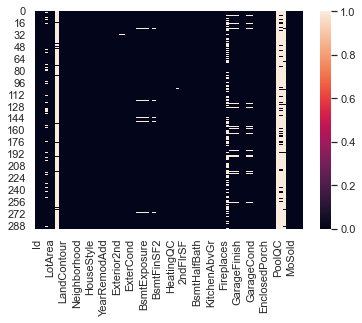

In [140]:
sns.heatmap(Test.isnull())

In [147]:
print(Test.fillna(Test.mean()))

       Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL    86.000000    14157   Pave   NaN      IR1   
1    1018         120       RL    66.425101     5814   Pave   NaN      IR1   
2     929          20       RL    66.425101    11838   Pave   NaN      Reg   
3    1148          70       RL    75.000000    12000   Pave   NaN      Reg   
4    1227          60       RL    86.000000    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL    78.000000    10206   Pave   NaN      Reg   
288  1048          20       RL    57.000000     9245   Pave   NaN      IR2   
289    17          20       RL    66.425101    11241   Pave   NaN      IR1   
290   523          50       RM    50.000000     5000   Pave   NaN      Reg   
291  1379         160       RM    21.000000     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fenc

In [152]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_list = ['MSZoning','LotFrontage','SaleType','SaleCondition']
for i in label_list:
    Test[i] = le.fit_transform(Test[i])

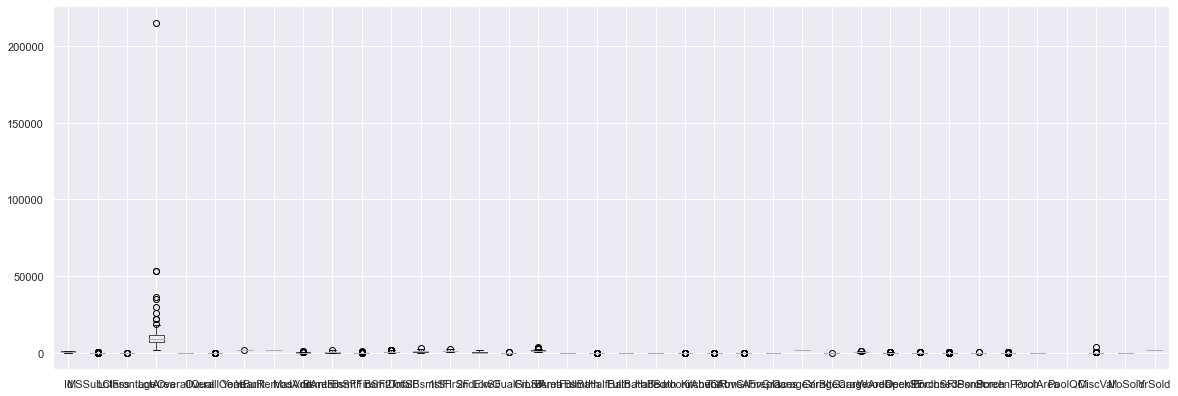

In [150]:
#Checking the outliers
Test.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()